In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [12]:
test_images = "C:\\Users\\Harsh Pathak\\Desktop\\Machine learning\\brain tumor classifiacation\\Testing"
train_images =  "C:\\Users\\Harsh Pathak\\Desktop\\Machine learning\\brain tumor classifiacation\\Training"

In [13]:
train_df = image_dataset_from_directory(
    train_images,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = [128,128],
    batch_size = 64,
    interpolation ='nearest',
    shuffle = True,
)

test_df = image_dataset_from_directory(
    test_images,
    labels = "inferred",
    label_mode = "categorical",
    image_size = [128,128],
    batch_size = 64,
    interpolation = "nearest",
    
)



Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [14]:
class_names = train_df.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [5]:
# class_names = np.array(class_names)
# class_names = np.vectorize(np.int)
# class_names

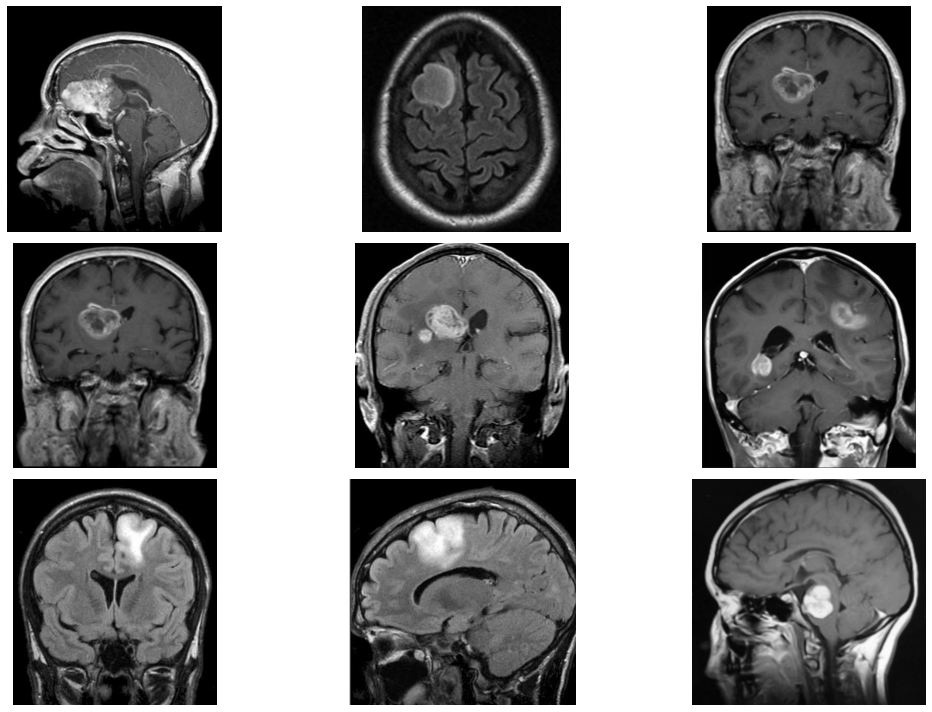

In [15]:
import os

def plot_images(direction):  
    list_direction=os.listdir(direction)

    plt.figure(figsize=(16,10))

    for i in range(1,10):
        plt.subplot(3,3,i)
        img=plt.imread(os.path.join(direction,list_direction[i]))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    
    
    
glioma = "C:\\Users\\Harsh Pathak\\Desktop\\Machine learning\\brain tumor classifiacation\\Testing\\glioma_tumor"
plot_images(glioma)




In [16]:
tf.keras.applications.vgg16.VGG16(include_top = False)

In [17]:
from keras.applications.vgg16 import VGG16

In [18]:
pretrained_base = VGG16(weights='imagenet',input_shape = (128,128,3),include_top= False,pooling='max')
pretrained_base.summary()
pretrained_base.trainable = False

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
model = tf.keras.Sequential([
    pretrained_base,
    BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    Dropout(0.55),
    layers.Dense(4,activation = 'softmax'),
    
])

In [27]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics = ['accuracy'],
             
)

history = model.fit(train_df,
                   validation_data=test_df,
                   epochs = 10,
                   verbose=1)

Epoch 1/10
45/45 [==============================] - 77s 2s/step - loss: 1.1189 - accuracy: 0.6028 - val_loss: 4.1675 - val_accuracy: 0.4442
Epoch 2/10
45/45 [==============================] - 75s 2s/step - loss: 0.6167 - accuracy: 0.7725 - val_loss: 2.8058 - val_accuracy: 0.5457
Epoch 3/10
45/45 [==============================] - 74s 2s/step - loss: 0.5057 - accuracy: 0.8059 - val_loss: 2.2108 - val_accuracy: 0.5838
Epoch 4/10
45/45 [==============================] - 75s 2s/step - loss: 0.3860 - accuracy: 0.8564 - val_loss: 1.9148 - val_accuracy: 0.6447
Epoch 5/10
45/45 [==============================] - 83s 2s/step - loss: 0.3364 - accuracy: 0.8780 - val_loss: 1.8364 - val_accuracy: 0.6751
Epoch 6/10
45/45 [==============================] - 84s 2s/step - loss: 0.2890 - accuracy: 0.8958 - val_loss: 1.7459 - val_accuracy: 0.6878
Epoch 7/10
45/45 [==============================] - 83s 2s/step - loss: 0.2678 - accuracy: 0.8965 - val_loss: 1.6922 - val_accuracy: 0.7081
Epoch 8/10
45/45 [==

In [21]:
model.evaluate(test_df)

7/7 [==============================] - 11s 1s/step - loss: 2.2132 - accuracy: 0.7462


[2.2131659984588623, 0.7461928725242615]